<a href="https://colab.research.google.com/github/Maksimka9/clustering-diploma-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Зависимости

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
#test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

sem_1_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_1.csv?raw=true"
sem_2_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_2.csv?raw=true"
sem_3_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_3.csv?raw=true"
sem_4_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_4.csv?raw=true"
sem_5_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_5.csv?raw=true"
sem_6_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_6.csv?raw=true"
sem_7_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_7.csv?raw=true"
sem_8_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_8.csv?raw=true"

df_sem_1 = pd.read_csv(sem_1_data, index_col=False)
df_sem_2 = pd.read_csv(sem_2_data, index_col=False)
df_sem_3 = pd.read_csv(sem_3_data, index_col=False)
df_sem_4 = pd.read_csv(sem_4_data, index_col=False)
df_sem_5 = pd.read_csv(sem_5_data, index_col=False)
df_sem_6 = pd.read_csv(sem_6_data, index_col=False)
df_sem_7 = pd.read_csv(sem_7_data, index_col=False)
df_sem_8 = pd.read_csv(sem_8_data, index_col=False)
df_sem_1

,hash,subj_административное право,subj_академическая живопись,subj_академический рисунок,subj_академический рисунок и скульптура,subj_актуальные вопросы финансов,subj_актуальные проблемы финансов,subj_алгебра логики и дискретный анализ,subj_анализ статистической информации с помощью пакетов прикладных программ,subj_аналитическая геометрия,...,subj_экономическая социология в россии,subj_экономическая теория,subj_элективные курсы по физической культуре,subj_элективные курсы по физической культуре и спорту,subj_электротехника и электроника,subj_электротехника и электронная техника,subj_элементы высшей математики,subj_этика делового общения,subj_этика деловых отношений,subj_языки высокого уровня
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,0,0,0,0,0,0,0,0,5,...,0,0,0,5,0,0,0,0,0,4
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0x0019D4D822B0D9A3DD3336438904749E38147903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0x001D374A732EE3FE32F65550A2D7E970C5EB7AE1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9848,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9849,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9850,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Вспомогательная таблица для сопоставления меток класса с хэш-номером студентов

hash_df_1 = df_sem_1[['hash']]
hash_df_2 = df_sem_2[['hash']]
hash_df_3 = df_sem_3[['hash']]
hash_df_4 = df_sem_4[['hash']]
hash_df_5 = df_sem_5[['hash']]
hash_df_6 = df_sem_6[['hash']]
hash_df_7 = df_sem_7[['hash']]
hash_df_8 = df_sem_8[['hash']]
hash_df_4

,hash
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8
2,0x0019D4D822B0D9A3DD3336438904749E38147903
3,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7
4,0x003E178322849C3A0C8CED05322BA8F0509FEFC9
...,...
8827,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB
8828,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6
8829,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28
8830,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648


In [4]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_df_1 = StandardScaler().fit_transform(df_sem_1.iloc[:,1:])
standart_df_2 = StandardScaler().fit_transform(df_sem_2.iloc[:,1:])
standart_df_3 = StandardScaler().fit_transform(df_sem_3.iloc[:,1:])
standart_df_4 = StandardScaler().fit_transform(df_sem_4.iloc[:,1:])
standart_df_5 = StandardScaler().fit_transform(df_sem_5.iloc[:,1:])
standart_df_6 = StandardScaler().fit_transform(df_sem_6.iloc[:,1:])
standart_df_7 = StandardScaler().fit_transform(df_sem_7.iloc[:,1:])
standart_df_8 = StandardScaler().fit_transform(df_sem_8.iloc[:,1:])

standart_df_list = [standart_df_1, standart_df_2, standart_df_3, standart_df_4, 
                    standart_df_5, standart_df_6, standart_df_7, standart_df_8]

standart_df_3

array([[-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       ...,
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391],
       [-0.09346704, -0.0534413 , -0.05301627, ..., -0.03996605,
        -0.04318351, -0.09755391]])

In [5]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

# Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df_1 = PCA(n_components=2).fit_transform(standart_df_1)
reduced_df_2 = PCA(n_components=2).fit_transform(standart_df_2)
reduced_df_3 = PCA(n_components=2).fit_transform(standart_df_3)
reduced_df_4 = PCA(n_components=2).fit_transform(standart_df_4)
reduced_df_5 = PCA(n_components=2).fit_transform(standart_df_5)
reduced_df_6 = PCA(n_components=2).fit_transform(standart_df_6)
reduced_df_7 = PCA(n_components=2).fit_transform(standart_df_7)
reduced_df_8 = PCA(n_components=2).fit_transform(standart_df_8)

# Превращаем результаты обратно в удобный вид
reduced_df_1 = pd.DataFrame(reduced_df_1) 
reduced_df_2 = pd.DataFrame(reduced_df_2)
reduced_df_3 = pd.DataFrame(reduced_df_3)
reduced_df_4 = pd.DataFrame(reduced_df_4)
reduced_df_5 = pd.DataFrame(reduced_df_5)
reduced_df_6 = pd.DataFrame(reduced_df_6)
reduced_df_7 = pd.DataFrame(reduced_df_7)
reduced_df_8 = pd.DataFrame(reduced_df_8)

reduced_df_list = [reduced_df_1, reduced_df_2, reduced_df_3, reduced_df_4,
                   reduced_df_5, reduced_df_6, reduced_df_7, reduced_df_8]

reduced_df_2

,0,1
0,0.873155,0.326358
1,1.739008,0.377624
2,-4.174363,-1.125976
3,-2.333496,-0.632101
4,0.993903,0.443436
...,...,...
9693,1.482708,1.013614
9694,1.647394,0.901346
9695,10.569223,-6.301409
9696,-0.324148,-0.031159


"\n# Выведем значение силуэта (оно максимизируется при использовании алгоритма k-средних)\n\nprint('Силуэт:', max(silhouette_dict, key=silhouette_dict.get), max(silhouette_dict.values()))\n\nprint('Калински-Харабаз:', max(calinski_score_dict, key=calinski_score_dict.get), max(calinski_score_dict.values()))\n\n# Выведем значение инерции (оно минимизируется при использовании алгоритма k-средних)\n\nprint('Дэвис-Боулдин:', min(davies_score_dict, key=davies_score_dict.get), min(davies_score_dict.values()))\n"

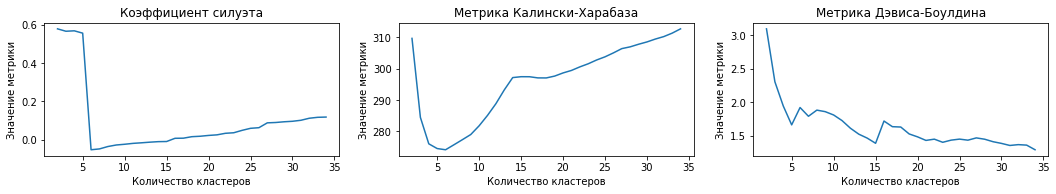

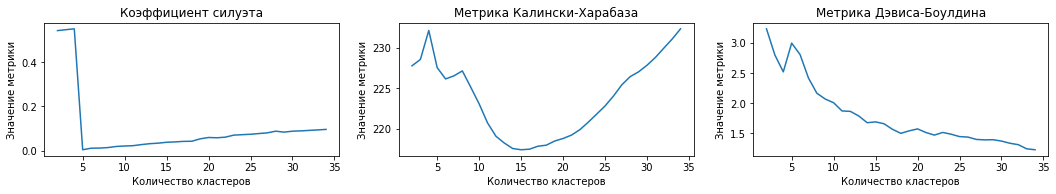

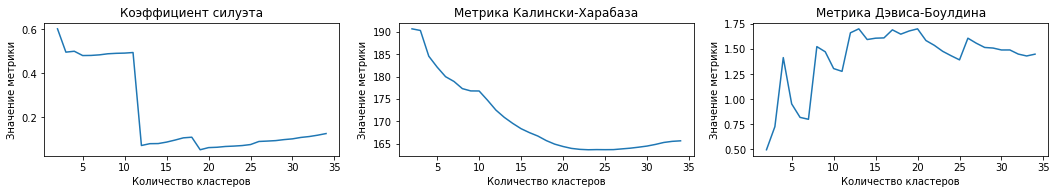

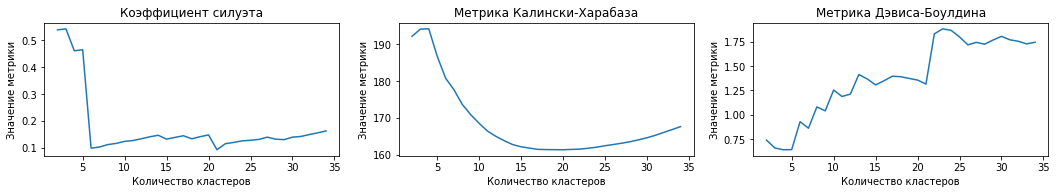

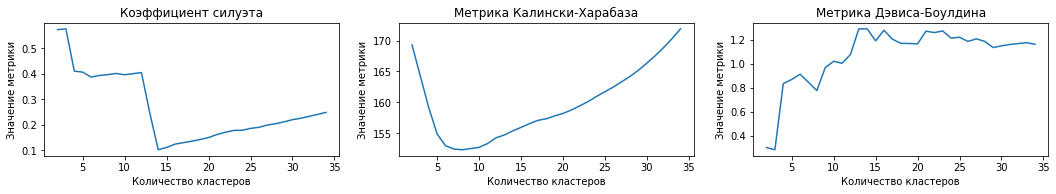

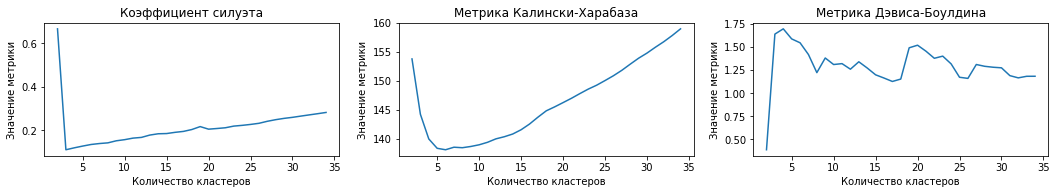

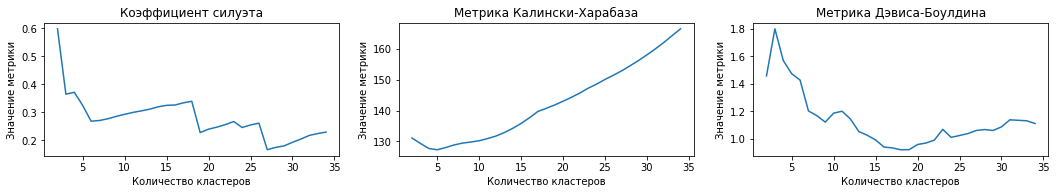

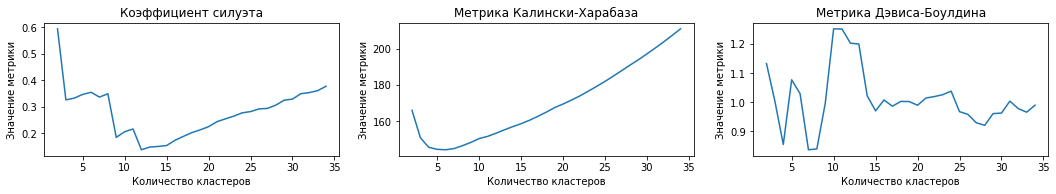

In [31]:
# Посчитаем коэффициент силуэта и инерцию - метрики кластеризации, чтобы понять насколько хорошо была проведена кластеризация.

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


# Создаём словарь для значений инерции и коэффициента силуэта по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}


n = 1 # Значение нужно для последующего вывода графиков

for df in standart_df_list:
  for k in range(2, 35):
    agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k) # Создаём экземпляр класса, где указываем количество кластеров и количество прогонов для одного значения (n_init)
    y = agglom_clustering.fit_predict(df) # Вычисляем к какому элементу отнести каждый кластер

    # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: инерция}
    transfer_list_silhouette = {k: silhouette_score(df, y)} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: к-т силуэта}
    transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(df, y)}
    transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(df, y)}
    # Переносим данные в главные словари
    silhouette_dict.update(transfer_list_silhouette)
    calinski_score_dict.update(transfer_list_calinski)
    davies_score_dict.update(transfer_list_davies)
    # Удаляем вспомогательные словари
    del(transfer_list_silhouette)
    del(transfer_list_calinski)
    del(transfer_list_davies)
  

  # Создаём pandas dataframe из словарей
  silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
  calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
  davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


  plt.figure(figsize=(18, 23))

  # Вывод графиков метрик по всем семестрам
  plt.subplot(8, 3, n)
  plt.plot(silhouette_df.index, silhouette_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Коэффициент силуэта')
  plt.subplot(8, 3, n+1)
  plt.plot(calinski_df.index, calinski_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Калински-Харабаза')
  plt.subplot(8, 3, n+2)
  plt.plot(davies_df.index, davies_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Дэвиса-Боулдина')
  n += 3



"""
# Выведем значение силуэта (оно максимизируется при использовании алгоритма k-средних)

print('Силуэт:', max(silhouette_dict, key=silhouette_dict.get), max(silhouette_dict.values()))

print('Калински-Харабаз:', max(calinski_score_dict, key=calinski_score_dict.get), max(calinski_score_dict.values()))

# Выведем значение инерции (оно минимизируется при использовании алгоритма k-средних)

print('Дэвис-Боулдин:', min(davies_score_dict, key=davies_score_dict.get), min(davies_score_dict.values()))
"""


In [7]:
# делаем кластеризацию вручную на определенном кол-ве кластеров

# Вычисляем к какому элементу отнести каждый кластер
kmeans = sklearn.cluster.KMeans(n_clusters = 15)
processed_df_1 = kmeans.fit_predict(standart_df_1) 
processed_df_2 = kmeans.fit_predict(standart_df_2)
processed_df_3 = kmeans.fit_predict(standart_df_3)
processed_df_4 = kmeans.fit_predict(standart_df_4)
processed_df_5 = kmeans.fit_predict(standart_df_5)
processed_df_6 = kmeans.fit_predict(standart_df_6)
processed_df_7 = kmeans.fit_predict(standart_df_7)
processed_df_8 = kmeans.fit_predict(standart_df_8)

# Превращаем NumPy array (в данном случае вектор) в pandas DataFrame
labels_df_1 = pd.DataFrame(processed_df_1, columns = ['labels'])
labels_df_2 = pd.DataFrame(processed_df_2, columns = ['labels'])
labels_df_3 = pd.DataFrame(processed_df_3, columns = ['labels'])
labels_df_4 = pd.DataFrame(processed_df_4, columns = ['labels']) 
labels_df_5 = pd.DataFrame(processed_df_5, columns = ['labels'])
labels_df_6 = pd.DataFrame(processed_df_6, columns = ['labels'])
labels_df_7 = pd.DataFrame(processed_df_7, columns = ['labels'])
labels_df_8 = pd.DataFrame(processed_df_8, columns = ['labels'])

labels_df_1

,labels
0,1
1,7
2,7
3,6
4,6
...,...
9847,0
9848,0
9849,9
9850,7


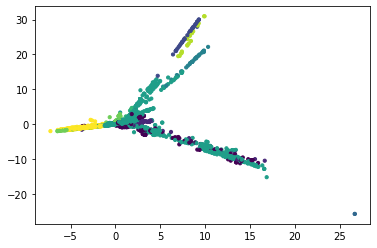

In [ ]:
# Отобразим набор данных, используя разные цвета для разных кластеров

# СДЕЛАТЬ ГРАФИК ДЛЯ КАЖДОГО СЕМЕСТРА ЧЕРЕЗ FOR ИЛИ ОСТАВИТЬ ВОЗМОЖНОСТЬ ВЫБОРА СЕМЕСТРА

matplotlib.pyplot.scatter(reduced_df[0], reduced_df[1], c = processed_df, s=10) # с - используемые цвета
matplotlib.pyplot.show()

In [ ]:
hash_df_1['labels'] = labels_df_1['labels'].values
hash_df_2['labels'] = labels_df_2['labels'].values
hash_df_3['labels'] = labels_df_3['labels'].values
hash_df_4['labels'] = labels_df_4['labels'].values
hash_df_5['labels'] = labels_df_5['labels'].values
hash_df_6['labels'] = labels_df_6['labels'].values
hash_df_7['labels'] = labels_df_7['labels'].values
hash_df_8['labels'] = labels_df_8['labels'].values
hash_df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,hash,labels
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,11
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,0
2,0x0019D4D822B0D9A3DD3336438904749E38147903,0
3,0x001D374A732EE3FE32F65550A2D7E970C5EB7AE1,2
4,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7,0
...,...,...
9847,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,2
9848,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6,2
9849,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28,6
9850,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0


In [ ]:
compare_labels_df = hash_df_1.merge(hash_df_2, on = 'hash', how = 'inner')
compare_labels_df = compare_labels_df.rename(columns={'labels_x':'labels_sem_1','labels_y':'labels_sem_2'})
compare_labels_df

,hash,labels_sem_1,labels_sem_2
0,0x000DE9673F941872AFFC6EF39B3B0EEAC868BA3B,11,3
1,0x00153956450F17DDD7C0610CF52E1476DE4E65E8,0,2
2,0x0019D4D822B0D9A3DD3336438904749E38147903,0,2
3,0x001D374A732EE3FE32F65550A2D7E970C5EB7AE1,2,3
4,0x0026AD5250A4C255F6687FBE6292D8EBE10915E7,0,2
...,...,...,...
9673,0xFFE57CD000A9958C3DB006F2EC9264E6874616AB,2,3
9674,0xFFEE3249B0511C419EF4CA031FA2F2A19C26B2F6,2,3
9675,0xFFEFB385175A8D99A1FCBBE7805433B9BBF68D28,6,3
9676,0xFFF3F87B5BE639E7AA3FB301DA2FD48D2074D648,0,3


In [ ]:
compare_labels_df.groupby(['labels_sem_1', 'labels_sem_2'])['hash'].count()

labels_sem_1  labels_sem_2
0             0                226
              1                  1
              2               2610
              3               1522
1             11                 3
2             1                 23
              2                143
              3               4264
              4                 28
              5                 50
              8                  1
              12                74
              13                 2
              14                40
3             3                 11
              8                 68
              9                 17
4             3                 25
5             3                 58
6             3                 61
7             7                 10
8             3                  1
9             3                  6
              10                47
10            2                  4
              3                190
11            2                  3
              3             

In [ ]:
group_df = pd.DataFrame(compare_labels_df.groupby(['labels_sem_1', 'labels_sem_2']))
group_df

,0,1
0,"(0, 0)",ha...
1,"(0, 1)",ha...
2,"(0, 2)",ha...
3,"(0, 3)",ha...
4,"(1, 11)",ha...
5,"(2, 1)",ha...
6,"(2, 2)",ha...
7,"(2, 3)",ha...
8,"(2, 4)",ha...
9,"(2, 5)",ha...


In [ ]:
# Сделать все графики метрик отдельно для презентации
# Визуализация данных - удобный способ посмотреть меняется ли структура данных, добавить картинки структуры для еще двух семестров.
# Реализовать 13 слайд